## Estadística Aplicada
 
Sesión 15 - 18 octubre
 
Karla Mariana Ley Acero - 2076201
 
Grupo 42

In [1]:
### Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Librerías especializadas

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

### Importar el modelo ARIMA

from statsmodels.tsa.arima.model import ARIMA

### Definir el tamaño de la gráfica

plt.rcParams['figure.figsize'] = (10,6)


In [3]:
### Datos

igae_deses = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [4]:
### PASOS A SEGUIR

## 1. Formato fecha (meses)
igae_deses['meses'] = pd.to_datetime(igae_deses['meses'], format='%Y/%m')

## 2. Fecha sea el index

igae_deses = igae_deses.set_index('meses')

## 3. Asignar una frecuencia
igae_deses.asfreq('MS')

,IGAE_DESES
meses,
1993-01-01,56.282290
1993-02-01,57.708594
1993-03-01,57.825254
1993-04-01,57.179522
1993-05-01,57.895451
...,...
2023-03-01,102.032776
2023-04-01,102.735045
2023-05-01,102.924688


In [5]:
pip install pmdarima

                                              0.0/566.2 kB ? eta -:--:--
     ------                                  92.2/566.2 kB 2.6 MB/s eta 0:00:01
     ------------------                     276.5/566.2 kB 3.4 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 4.4 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 3.3 MB/s eta 0:00:00
                                              0.0/2.8 MB ? eta -:--:--
     -------                                  0.5/2.8 MB 11.1 MB/s eta 0:00:01
     ------------                             0.9/2.8 MB 9.6 MB/s eta 0:00:01
     ---------------------                    1.5/2.8 MB 10.4 MB/s eta 0:00:01
     ----------------------------             2.0/2.8 MB 10.6 MB/s eta 0:00:01
     ------------------------------------     2.6/2.8 MB 10.9 MB/s eta 0:00:01
     ---------------------------------------  2.8/2.8 MB 11.1 MB/s eta 0:00:01
     ---------------------------------------- 2.8/2.8 MB 9.4 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pmdarima as pm

#Ignorar los warnings

import warnings
warnings.filterwarnings("ignore")

In [9]:
help(pm.auto_arima)

#Auto arima es para encontrar el orden correcto del ARIMA, hace lo mismo que la sesion 14 pero en una sola funcion que se llama Autoarima

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [13]:
# Saber que proceso ARIMA es el IGAE
pm.auto_arima(igae_deses['IGAE_DESES'],
              start_p=1,
              start_q=1,
              max_p=7,
              max_q=7,
              ic='aic',
              seasonal=False)
# p minuscula es el orden de la AR
# q es el orden de la media movil

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [15]:
# ARIMA estacional
# Series de tiempo con componente estacional
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

In [16]:
# frecuencia
pasajeros=pasajeros.asfreq('MS')

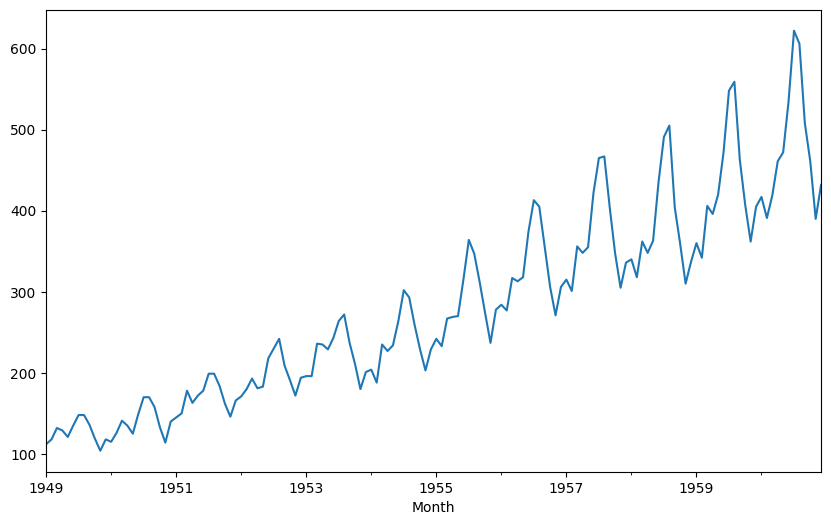

In [17]:
pasajeros['Thousands of Passengers'].plot()
plt.show()

In [18]:
# Si la serie es estacionaria
prueba_DFA=adfuller(pasajeros['Thousands of Passengers'])
pvalue=prueba_DFA[1]
pvalue

0.991880243437641

*No se rechaza Ho, la serie ('Thousands of passengers') es no estacionaria*

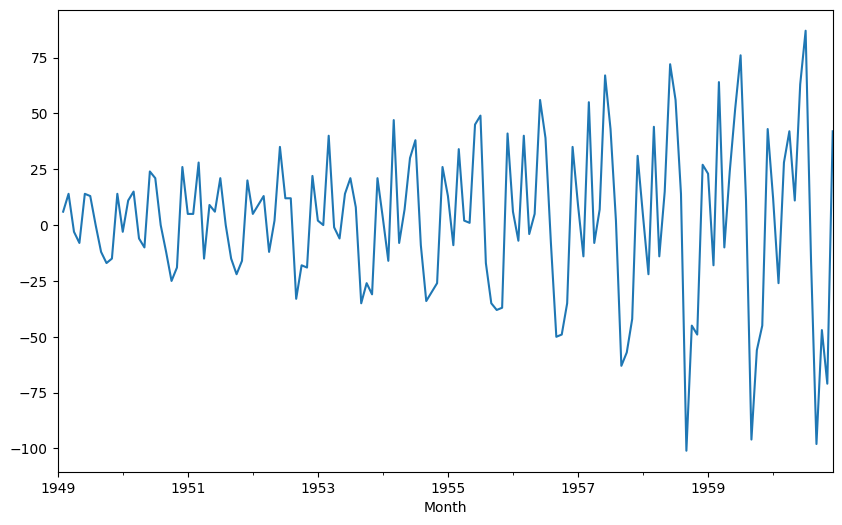

In [20]:
# Calcular las primeras diferencias
pasajeros['passengers_diff']=pasajeros['Thousands of Passengers'].diff()
pasajeros['passengers_diff'].plot()
plt.show()

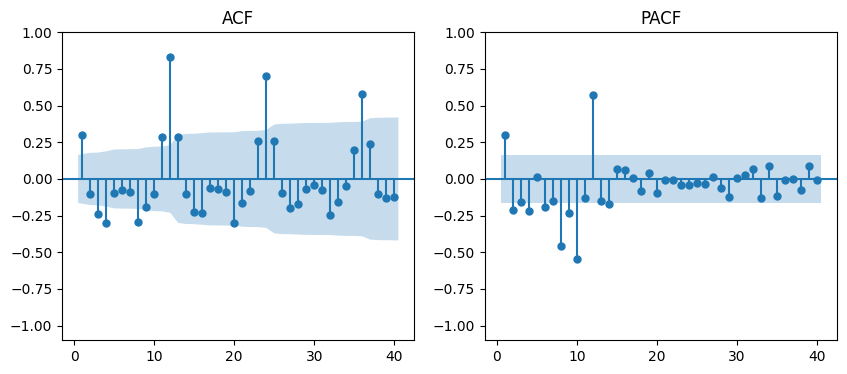

In [24]:
# Graficas de autocorrelacion
ig,ax=plt.subplots(1,2,figsize=(10,4))
# 1
plot_acf(pasajeros['passengers_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='ACF')
ax[0].set_ylim(-1.1)
# 2
plot_pacf(pasajeros['passengers_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='PACF')
ax[1].set_ylim(-1.1)
plt.show()

## Tiene un componente estacional, el patrón que tiene nos lo indica

Esta es una serie con componente estacional

- Proceso estacionario: Media, covarianza y varianza constante
-  estacional de la serie del enfoque clásico: El que se repite la misma fecha

El enfoque estocastico se basa si la serie es estacionaria o no
EL enfoque clascico establece el componente estacional

Proceso ARIMA se combinan ambos enfoques.

El enfoque de arriba es una serie que quisimos hacer estacionaria, con las primeras diferencias pero no funcionó, esta serie tiene componente estacional.



In [25]:
pm.auto_arima(pasajeros['Thousands of Passengers'],
              ## Encontrar lo de la ARIMA normal (minusculas)
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ## Parte estacional
              seasonal= True,
              #Orden estacional
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,)


#El resultado es un modelo SARIMA

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

SARIMA(p,I,q)(P,D,Q)


SARIMA(0,1,1)(2,1,0)

In [29]:
## Estimar el modelo 
model = ARIMA(pasajeros['Thousands of Passengers'], order=(0,1,1), seasonal_order=(2,1,0,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Wed, 18 Oct 2023   AIC                           1019.178
Time:                                   16:15:26   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372

In [30]:
## Hacer el pronostico
pasajeros['pronóstico'] = results.predict()

In [31]:
pasajeros.head()


,Thousands of Passengers,passengers_diff,pronóstico
Month,,,
1949-01-01,112,NaN,0.000000
1949-02-01,118,6.0,111.997178
1949-03-01,132,14.0,117.999698
1949-04-01,129,-3.0,131.999295
1949-05-01,121,-8.0,129.000151


In [33]:
## El primer pronóstico hay que darle el valor inicial

pasajeros['pronóstico'][0] = pasajeros['Thousands of Passengers'][0]

In [34]:
pasajeros.head()

,Thousands of Passengers,passengers_diff,pronóstico
Month,,,
1949-01-01,112,NaN,112.000000
1949-02-01,118,6.0,111.997178
1949-03-01,132,14.0,117.999698
1949-04-01,129,-3.0,131.999295
1949-05-01,121,-8.0,129.000151


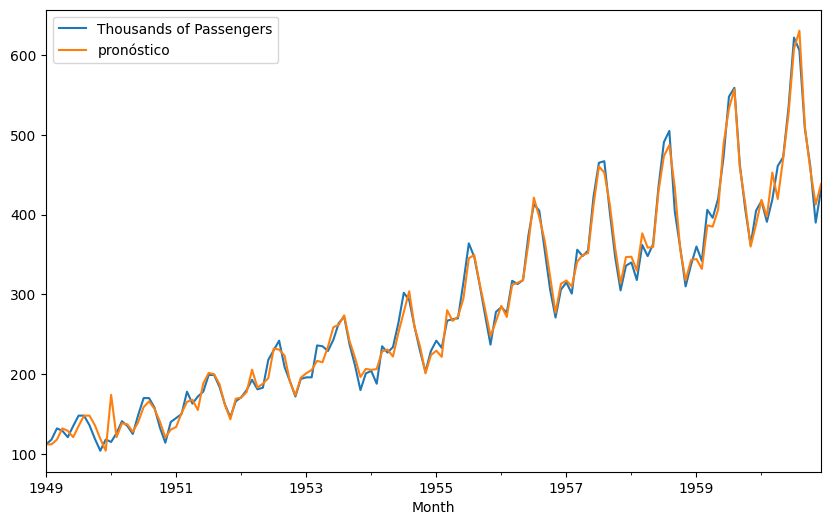

In [35]:
## Graficamos

pasajeros['Thousands of Passengers'].plot()
pasajeros['pronóstico'].plot()
plt.legend()

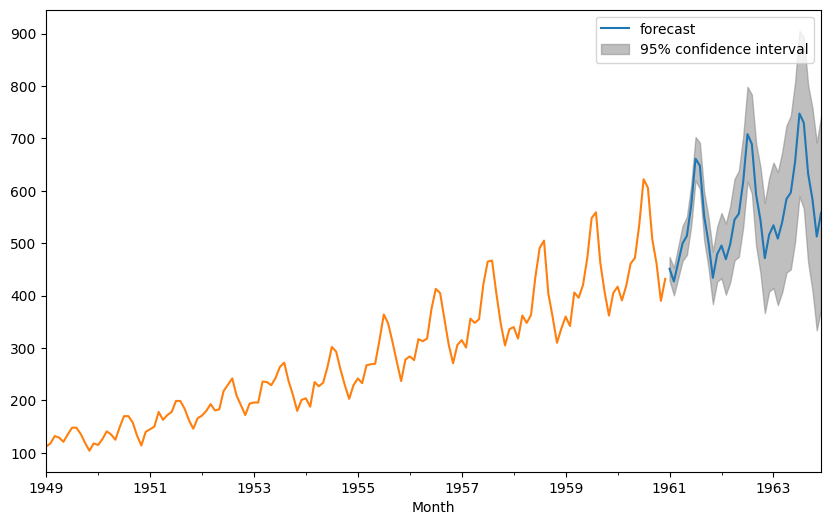

In [38]:
plot_predict(results, start='1961-01-01', end='1963-12-01')
pasajeros['Thousands of Passengers'].plot();

In [36]:
## Ver donde termina la serie
pasajeros.tail(1)

,Thousands of Passengers,passengers_diff,pronóstico
Month,,,
1960-12-01,432,42.0,438.478199


In [40]:
## Acceder a los valores

results.predict(start='1961-01-01', end='1963-12-01')


1961-01-01    451.347076
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310508
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532195
1962-12-01    516.127935
1963-01-01    534.240091
1963-02-01    508.800960
1963-03-01    539.738523
1963-04-01    584.297670
1963-05-01    596.726148
1963-06-01    655.955970
1963-07-01    747.458851
1963-08-01    729.939146
1963-09-01    632.906669
1963-10-01    583.931319
1963-11-01    512.892704
1963-12-01    558.168624
Freq: MS, Name: predicted_mean, dtype: float64

Explorar si es una serie con componente estacional, si lo es hay que ejecutar un modelo SARIMA, si no un modelo ARIMA normal